# Section 5: Machine Learning - Classification of Car Buying Price

In this notebook, with a **Car Evaluation Data Set**, we are going to create a machine learning model to predict the buying price given the following parameters:
Maintenance = High; Number of doors = 4; Lug Boot Size = Big; Safety = High; Class Value = Good

## About dataset

The *car.data* data set includes details of 1728 car transactions. It includes following fields:


| Field | Description |
| :--- | :--- |
| buying | buying price |
| maint | price of the maintenance |
| doors | number of doors |
| persons | capacity in terms of persons to carry |
| lug_boot | the size of luggage boot |
| safety | estimated safety of the car |
| class_values | car acceptability |

In [246]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Load and Clean Data

In [247]:
# read from data file
df0 = pd.read_csv('car.data', header=None)
df0.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [383]:
# add header
df1 = df0.rename({0: 'buying', 1: 'maint', 2: 'doors', 3: 'persons', 4: 'lug_boot', 5: 'safety', 6: 'class_values'}, axis=1)
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [384]:
# drop person field as requested
df = df1.drop(['persons'], axis=1)
df.head(10)

,buying,maint,doors,lug_boot,safety,class_values
0,vhigh,vhigh,2,small,low,unacc
1,vhigh,vhigh,2,small,med,unacc
2,vhigh,vhigh,2,small,high,unacc
3,vhigh,vhigh,2,med,low,unacc
4,vhigh,vhigh,2,med,med,unacc
5,vhigh,vhigh,2,med,high,unacc
6,vhigh,vhigh,2,big,low,unacc
7,vhigh,vhigh,2,big,med,unacc
8,vhigh,vhigh,2,big,high,unacc
9,vhigh,vhigh,2,small,low,unacc


In [408]:
df.shape

(1728, 6)

## First Time Model Training

### Get Independent and Dependent Variables

#### Independent Variables - Use one hot encoding technique to conver categorical varables

In [386]:
# Independent Variables
Feature = df.drop(['buying'], axis=1)
Feature = pd.get_dummies(Feature, prefix_sep='_', drop_first=True)
Feature.head()             

,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,lug_boot_med,lug_boot_small,safety_low,safety_med,class_values_good,class_values_unacc,class_values_vgood
0,0,0,1,0,0,0,0,1,1,0,0,1,0
1,0,0,1,0,0,0,0,1,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,1,0,0,1,0
4,0,0,1,0,0,0,1,0,0,1,0,1,0


In [387]:
X = Feature

#### Dependent Variables - Buying Price

In [388]:
y = df['buying'].values
y[0:5]

array(['vhigh', 'vhigh', 'vhigh', 'vhigh', 'vhigh'], dtype=object)

### K Nearest Neighbor(KNN) Classification

In [389]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [390]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [391]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)
print(std_acc)

[0.23121387 0.18786127 0.16184971 0.15317919 0.1734104  0.15028902
 0.15895954 0.15895954 0.16763006 0.17919075 0.19942197 0.18786127
 0.21965318 0.22254335 0.20809249 0.23410405 0.23699422 0.21965318
 0.19364162]
[0.02266583 0.02099886 0.01980062 0.01936233 0.02035375 0.0192115
 0.01965684 0.01965684 0.0200815  0.02061773 0.02148079 0.02099886
 0.02225741 0.02236183 0.02182365 0.02276414 0.02286097 0.02225741
 0.02124346]


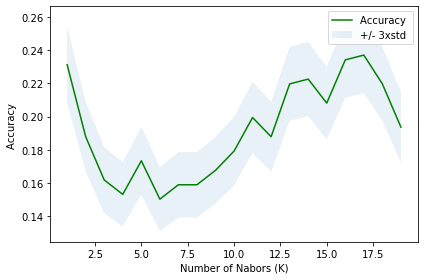

In [392]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

#### We can see the accuracy is very low! There must be some problem. Let's find it out!

### Data visualization

Take a look at the data distribution:

#### Distribution of buying price

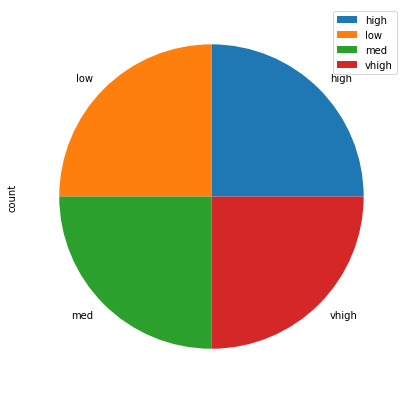

In [305]:
df.groupby(['buying']).size().to_frame('count').plot.pie(y='count',figsize=(7, 7))

#### class_values vs buying

In [395]:
pv1 = df.groupby(['class_values','buying']).size().to_frame('count').reset_index().pivot(index='class_values', columns='buying', values='count')
pv1

buying,high,low,med,vhigh
class_values,,,,
acc,108.0,89.0,115.0,72.0
good,NaN,46.0,23.0,NaN
unacc,324.0,258.0,268.0,360.0
vgood,NaN,39.0,26.0,NaN


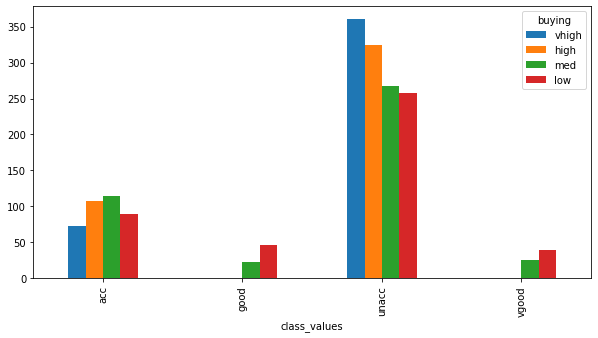

In [396]:
pv1.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 5))

#### maint vs buying

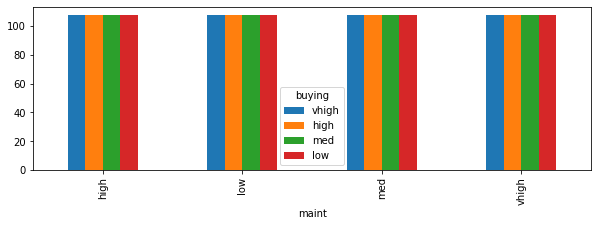

In [398]:
pv2 = df.groupby(['maint','buying']).size().to_frame('count').reset_index().pivot(index='maint', columns='buying', values='count')
pv2.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 3))

#### doors vs buying

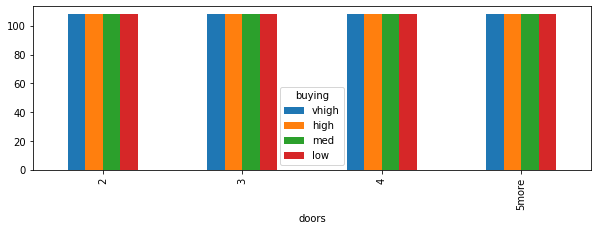

In [399]:
pv3 = df.groupby(['doors','buying']).size().to_frame('count').reset_index().pivot(index='doors', columns='buying', values='count')
pv3.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 3))

#### lug_boot vs buying

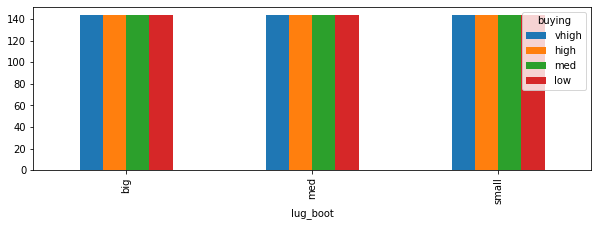

In [400]:
pv4 = df.groupby(['lug_boot','buying']).size().to_frame('count').reset_index().pivot(index='lug_boot', columns='buying', values='count')
pv4.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 3))

#### safety vs buying

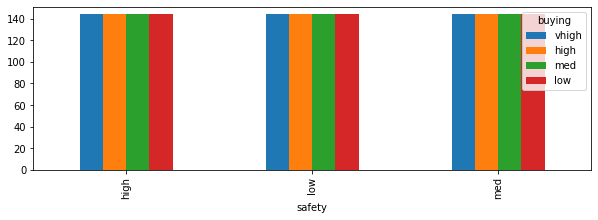

In [401]:
pv5 = df.groupby(['safety','buying']).size().to_frame('count').reset_index().pivot(index='safety', columns='buying', values='count')
pv5.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 3))

#### We can see that buying distributed equivalently among the features. It is because this dataset is used for class_values prediction originally, so the record numbers are equivalent for different value of a feature. 

#### Let's randomly select records from original dataset to make some difference.

Let's see the record number of different class_values 

In [407]:
pv0 = df.groupby(['class_values']).size().to_frame('count').reset_index()
pv0

,class_values,count
0,acc,384
1,good,69
2,unacc,1210
3,vgood,65


Randomly select 100 and 200 records accordingly from 'acc' and 'unacc'

In [448]:
df_class_1 = df[df['class_values']=='acc']
df_class_1 = df_class_1.sample(100)
df_class_2 = df[df['class_values']=='good']
df_class_3 = df[df['class_values']=='unacc']
df_class_3 = df_class_3.sample(200)
df_class_4 = df[df['class_values']=='vgood']
df_new = pd.concat([df_class_1, df_class_2, df_class_3, df_class_4])
df_new.head()

,buying,maint,doors,lug_boot,safety,class_values
1126,med,med,3,small,med,acc
1445,low,high,3,med,high,acc
1132,med,med,3,big,med,acc
1373,low,vhigh,4,med,high,acc
836,high,low,4,big,high,acc


In [456]:
df_new.shape

(434, 6)

#### Let's look at the data distribution again.

#### Distribution of buying price

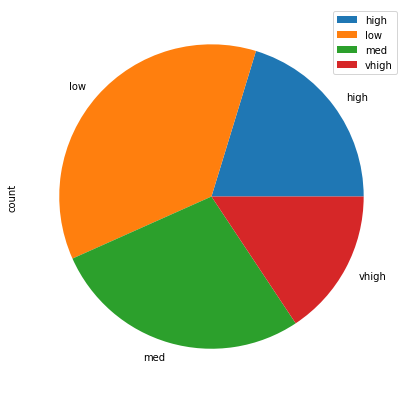

In [457]:
df_new.groupby(['buying']).size().to_frame('count').plot.pie(y='count',figsize=(7, 7))

#### class_values vs buying

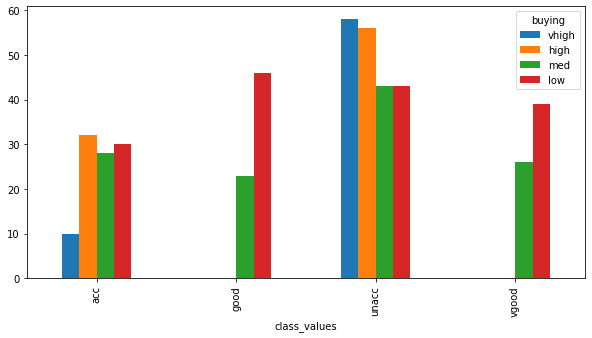

In [458]:
pv1 = df_new.groupby(['class_values','buying']).size().to_frame('count').reset_index().pivot(index='class_values', columns='buying', values='count')
pv1.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 5))

#### maint vs buying

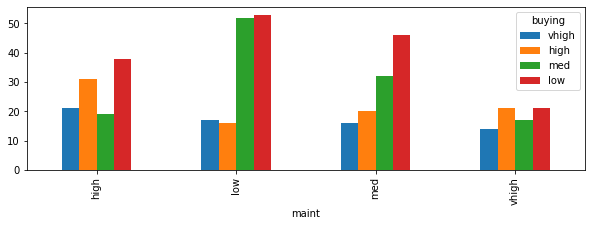

In [459]:
pv2 = df_new.groupby(['maint','buying']).size().to_frame('count').reset_index().pivot(index='maint', columns='buying', values='count')
pv2.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 3))

#### doors vs buying

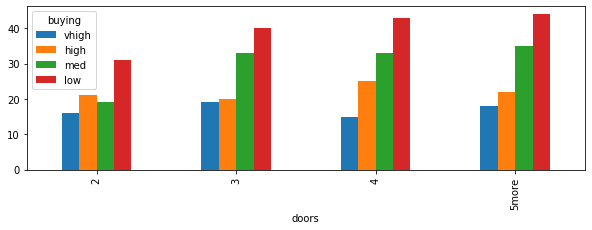

In [460]:
pv3 = df_new.groupby(['doors','buying']).size().to_frame('count').reset_index().pivot(index='doors', columns='buying', values='count')
pv3.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 3))

#### lug_boot vs buying

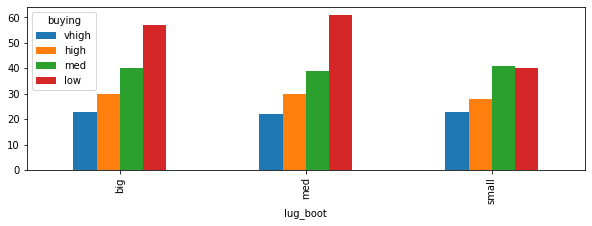

In [461]:
pv4 = df_new.groupby(['lug_boot','buying']).size().to_frame('count').reset_index().pivot(index='lug_boot', columns='buying', values='count')
pv4.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 3))

#### safety vs buying

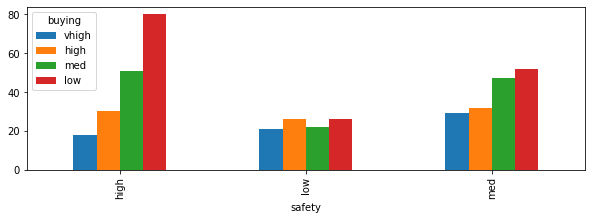

In [462]:
pv5 = df_new.groupby(['safety','buying']).size().to_frame('count').reset_index().pivot(index='safety', columns='buying', values='count')
pv5.plot(kind='bar',y=['vhigh','high','med','low'],figsize=(10, 3))

#### The data looks better this time!

## Second Time Model Training

### Get Independent and Dependent Variables

In [463]:
# Independent Variables
Feature = df_new.drop(['buying'], axis=1)
Feature = pd.get_dummies(Feature, prefix_sep='_', drop_first=True)
Feature.head()   

,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,lug_boot_med,lug_boot_small,safety_low,safety_med,class_values_good,class_values_unacc,class_values_vgood
1126,0,1,0,1,0,0,0,1,0,1,0,0,0
1445,0,0,0,1,0,0,1,0,0,0,0,0,0
1132,0,1,0,1,0,0,0,0,0,1,0,0,0
1373,0,0,1,0,1,0,1,0,0,0,0,0,0
836,1,0,0,0,1,0,0,0,0,0,0,0,0


In [464]:
X = Feature

In [465]:
y = df_new['buying'].values
y[0:5]

array(['med', 'low', 'med', 'low', 'high'], dtype=object)

### K Nearest Neighbor(KNN) Classification

In [453]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [454]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)
print(std_acc)

[0.28735632 0.31034483 0.32183908 0.31034483 0.32183908 0.36781609
 0.36781609 0.33333333 0.3908046  0.36781609 0.3908046  0.35632184
 0.37931034 0.40229885 0.3908046  0.31034483 0.35632184 0.33333333
 0.33333333]
[0.04851622 0.04959965 0.05008713 0.04959965 0.05008713 0.05169844
 0.05169844 0.05053987 0.05231166 0.05169844 0.05231166 0.05134474
 0.05202055 0.05257228 0.05231166 0.04959965 0.05134474 0.05053987
 0.05053987]


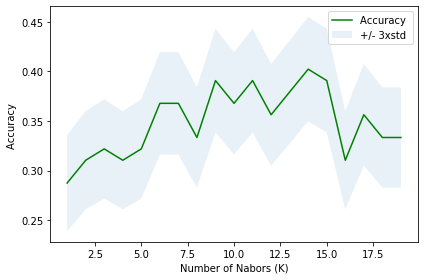

In [455]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [467]:
print( "The best accuracy was with", mean_acc.max(), "with number of neighbors k=", mean_acc.argmax()+1)

The best accuracy was with 0.40229885057471265 with number of neighbors k= 14


# Predict Buying Price

Parameters: 
Maintenance = High; 
Number of doors = 4; 
Lug Boot Size = Big; 
Safety = High; 
Class Value = Good

In [469]:
# convert parameters into dummy dataframe
data_test = [[0,0,0,0,1,0,0,0,0,0,1,0,0]]
Feature_test = pd.DataFrame(data_test, columns = ['maint_low','maint_med','maint_vhigh','doors_3','doors_4','doors_5more','lug_boot_med','lug_boot_small','safety_low','safety_med','class_values_good','class_values_unacc','class_values_vgood'])
Feature_test

,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,lug_boot_med,lug_boot_small,safety_low,safety_med,class_values_good,class_values_unacc,class_values_vgood
0,0,0,0,0,1,0,0,0,0,0,1,0,0


Predict using trained model

In [470]:
neigh = KNeighborsClassifier(n_neighbors = 14).fit(X_train,y_train)
yhat_KNN=neigh.predict(Feature_test)

In [475]:
print("The predicted buying prices is:",yhat_KNN[0])

The predicted buying prices is: low
